<a href="https://colab.research.google.com/github/EcuAlejo/proycapstoneACUZCO/blob/main/1_FD001_EDA%2Bbaseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Profundicemos cargando los datos e iniciando nuestro Análisis Exploratorio de Datos (EDA) inspeccionando las primeras filas, para tener una idea de cómo se ven los datos.

In [ ]:

# definir ruta de archivo y archivos para leer datos
dir_path = '/content/sample_data/tesis/'
train_file = 'train_FD001.txt'
test_file = 'test_FD001.txt'

# definir nombres de columnas para una fácil indexación
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names

# leer data
train = pd.read_csv((dir_path+train_file), sep='\s+', header=None,
                 names=col_names)
test = pd.read_csv((dir_path+test_file), sep='\s+', header=None,
                 names=col_names)
y_test = pd.read_csv((dir_path+'RUL_FD001.txt'), sep='\s+', header=None,
                 names=['RemainingUsefulLife'])

# comprobar la forma e inspeccionar las primeras filas
print(train.shape)
train.head()

(20631, 26)


unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0        1            1    -0.0007    -0.0004      100.0  518.67  641.82   
1        1            2     0.0019    -0.0003      100.0  518.67  642.15   
2        1            3    -0.0043     0.0003      100.0  518.67  642.35   
3        1            4     0.0007     0.0000      100.0  518.67  642.35   
4        1            5    -0.0019    -0.0002      100.0  518.67  642.37   

       s_3      s_4    s_5  ...    s_12     s_13     s_14    s_15  s_16  s_17  \
0  1589.70  1400.60  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03   392   
1  1591.82  1403.14  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03   392   
2  1587.99  1404.20  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03   390   
3  1582.79  1401.87  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03   392   
4  1582.85  1406.22  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03   393   

   s_18   s_19   s_20     s_21  
0  2388  100.0  39.06  23.4190  
1  2388  100.0  39.00  23.4236  
2  2388  100.0  38.95  23.3442  
3  2388  100.0  38.88  23.3739  
4  2388  100.0  38.90  23.4044  

[5 rows x 26 columns]

In [ ]:
# inspeccionar ciclos de tiempo
train[index_names].groupby('unit_nr').max().describe()

time_cycles
count   100.000000
mean    206.310000
std      46.342749
min     128.000000
25%     177.000000
50%     199.000000
75%     229.250000
max     362.000000

In [ ]:
# inspeccionar la configuración
train[setting_names].describe()

setting_1     setting_2  setting_3
count  20631.000000  20631.000000    20631.0
mean      -0.000009      0.000002      100.0
std        0.002187      0.000293        0.0
min       -0.008700     -0.000600      100.0
25%       -0.001500     -0.000200      100.0
50%        0.000000      0.000000      100.0
75%        0.001500      0.000300      100.0
max        0.008700      0.000600      100.0

In [ ]:
# inspeccionar los valores del sensor, específicamente si hay alguno con una desviación estándar cercana a 0
# (las lecturas de los sensores que no cambian con el tiempo no contienen información)
train[sensor_names].describe().transpose()

count         mean           std        min        25%        50%  \
s_1   20631.0   518.670000  0.000000e+00   518.6700   518.6700   518.6700   
s_2   20631.0   642.680934  5.000533e-01   641.2100   642.3250   642.6400   
s_3   20631.0  1590.523119  6.131150e+00  1571.0400  1586.2600  1590.1000   
s_4   20631.0  1408.933782  9.000605e+00  1382.2500  1402.3600  1408.0400   
s_5   20631.0    14.620000  1.776400e-15    14.6200    14.6200    14.6200   
s_6   20631.0    21.609803  1.388985e-03    21.6000    21.6100    21.6100   
s_7   20631.0   553.367711  8.850923e-01   549.8500   552.8100   553.4400   
s_8   20631.0  2388.096652  7.098548e-02  2387.9000  2388.0500  2388.0900   
s_9   20631.0  9065.242941  2.208288e+01  9021.7300  9053.1000  9060.6600   
s_10  20631.0     1.300000  0.000000e+00     1.3000     1.3000     1.3000   
s_11  20631.0    47.541168  2.670874e-01    46.8500    47.3500    47.5100   
s_12  20631.0   521.413470  7.375534e-01   518.6900   520.9600   521.4800   
s_13  20631.0  2388.096152  7.191892e-02  2387.8800  2388.0400  2388.0900   
s_14  20631.0  8143.752722  1.907618e+01  8099.9400  8133.2450  8140.5400   
s_15  20631.0     8.442146  3.750504e-02     8.3249     8.4149     8.4389   
s_16  20631.0     0.030000  1.387812e-17     0.0300     0.0300     0.0300   
s_17  20631.0   393.210654  1.548763e+00   388.0000   392.0000   393.0000   
s_18  20631.0  2388.000000  0.000000e+00  2388.0000  2388.0000  2388.0000   
s_19  20631.0   100.000000  0.000000e+00   100.0000   100.0000   100.0000   
s_20  20631.0    38.816271  1.807464e-01    38.1400    38.7000    38.8300   
s_21  20631.0    23.289705  1.082509e-01    22.8942    23.2218    23.2979   

            75%        max  
s_1    518.6700   518.6700  
s_2    643.0000   644.5300  
s_3   1594.3800  1616.9100  
s_4   1414.5550  1441.4900  
s_5     14.6200    14.6200  
s_6     21.6100    21.6100  
s_7    554.0100   556.0600  
s_8   2388.1400  2388.5600  
s_9   9069.4200  9244.5900  
s_10     1.3000     1.3000  
s_11    47.7000    48.5300  
s_12   521.9500   523.3800  
s_13  2388.1400  2388.5600  
s_14  8148.3100  8293.7200  
s_15     8.4656     8.5848  
s_16     0.0300     0.0300  
s_17   394.0000   400.0000  
s_18  2388.0000  2388.0000  
s_19   100.0000   100.0000  
s_20    38.9500    39.4300  
s_21    23.3668    23.6184

In [ ]:
# Antes de comenzar a trazar los datos, calculemos RUL.

In [ ]:
def add_remaining_useful_life(df):
    # Obtenga el número total de ciclos para cada unidad
    grouped_by_unit = df.groupby(by="unit_nr")
    max_cycle = grouped_by_unit["time_cycles"].max()

    # Combinar el ciclo máximo nuevamente en el marco original
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)

    # Calcular la vida útil restante para cada fila.
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
    result_frame["RUL"] = remaining_useful_life

    # elimine max_cycle ya que ya no es necesario
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame

train = add_remaining_useful_life(train)
train[index_names+['RUL']].head()

unit_nr  time_cycles  RUL
0        1            1  191
1        1            2  190
2        1            3  189
3        1            4  188
4        1            5  187

## gráficos

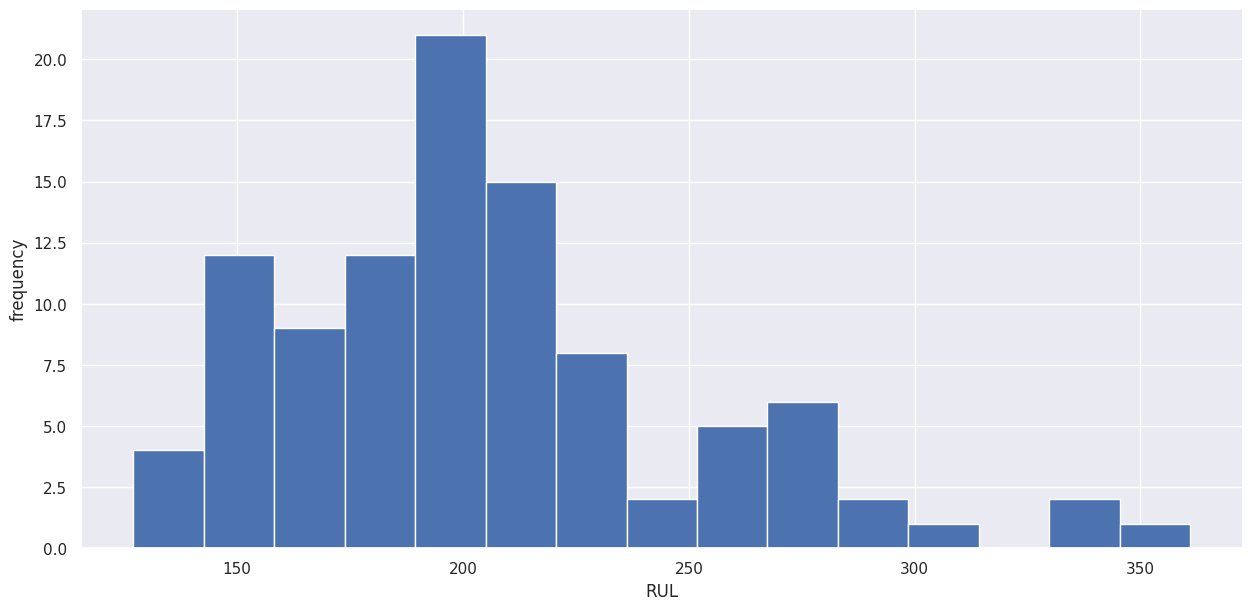

In [ ]:
# # distribución de RUL, similar a la 'función de descripción' de time_cycles anterior, pero visual
df_max_rul = train[['unit_nr', 'RUL']].groupby('unit_nr').max().reset_index()
df_max_rul['RUL'].hist(bins=15, figsize=(15,7))
plt.xlabel('RUL')
plt.ylabel('frequency')
plt.show()

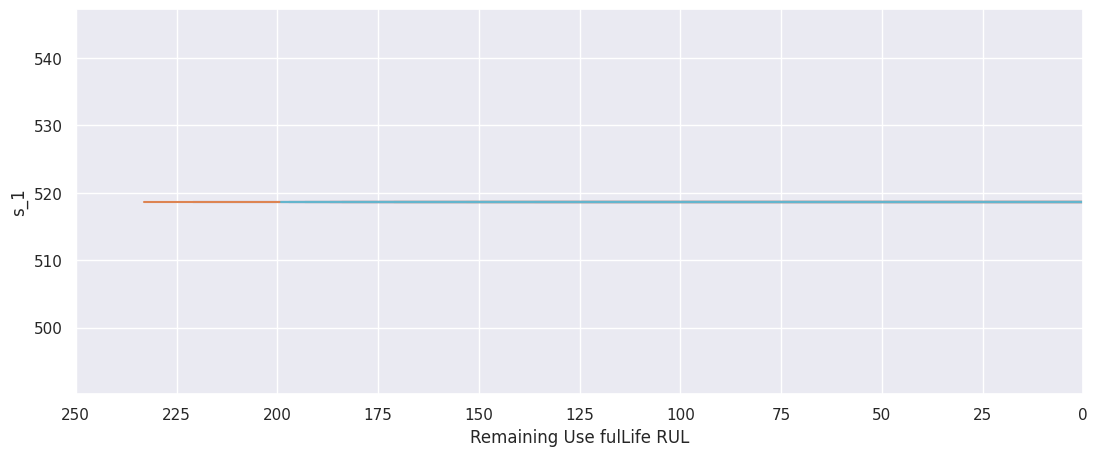

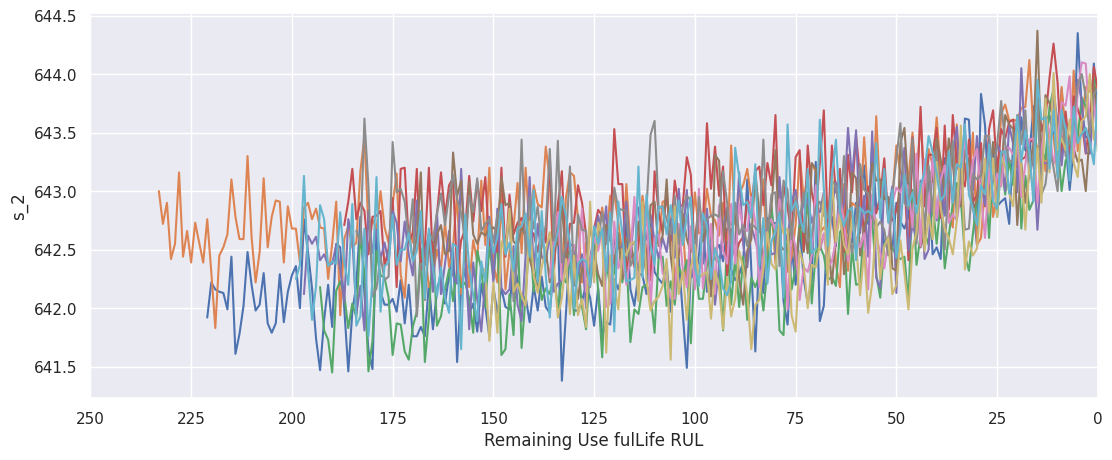

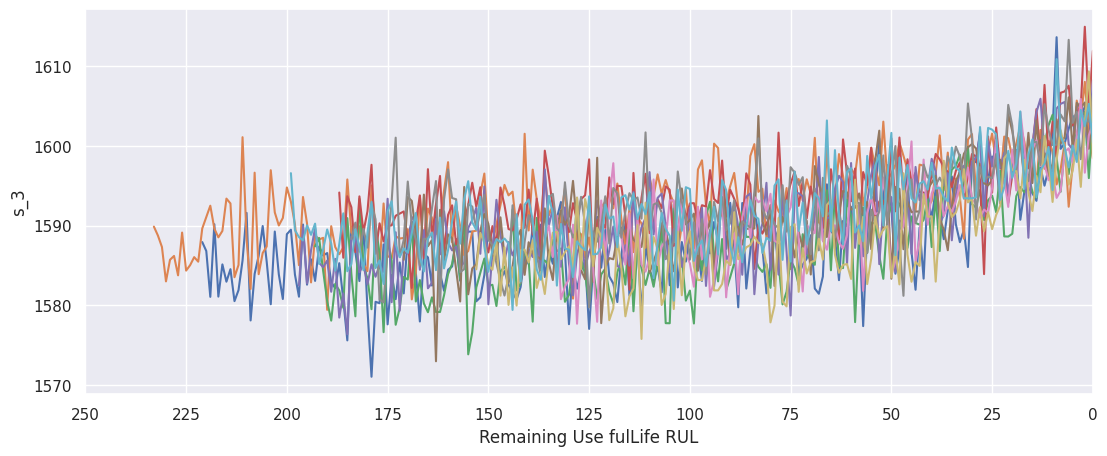

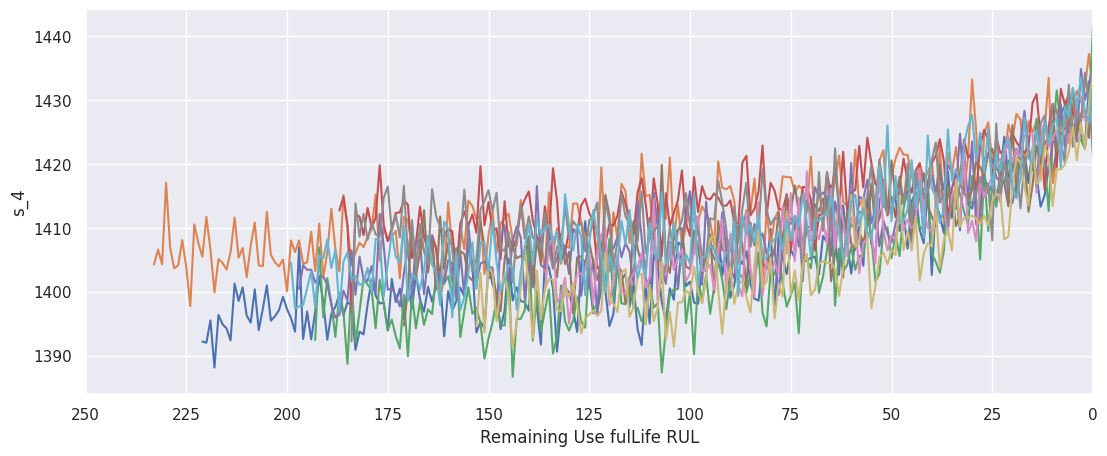

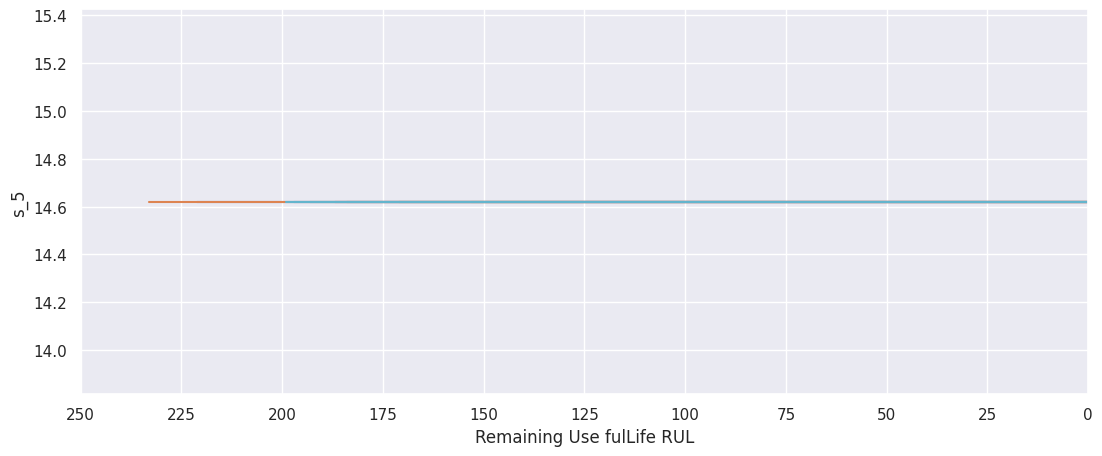

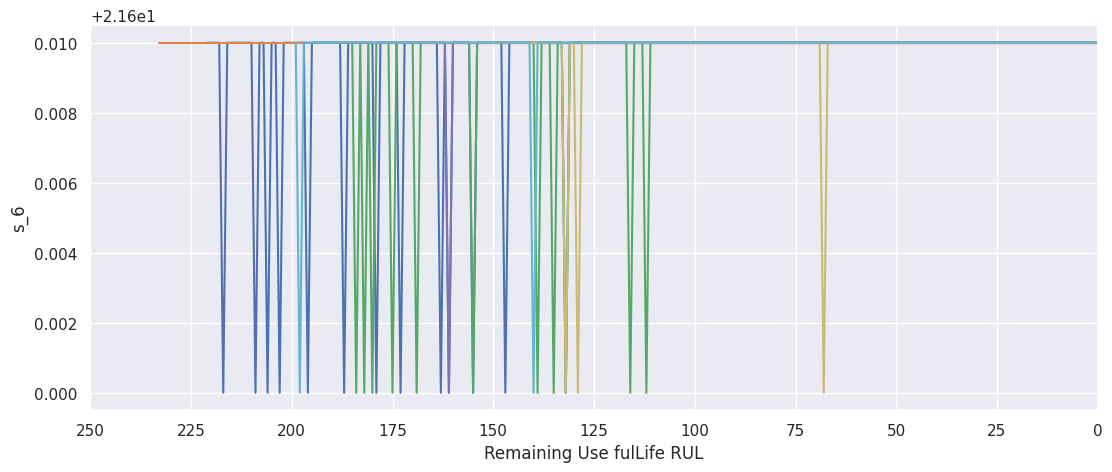

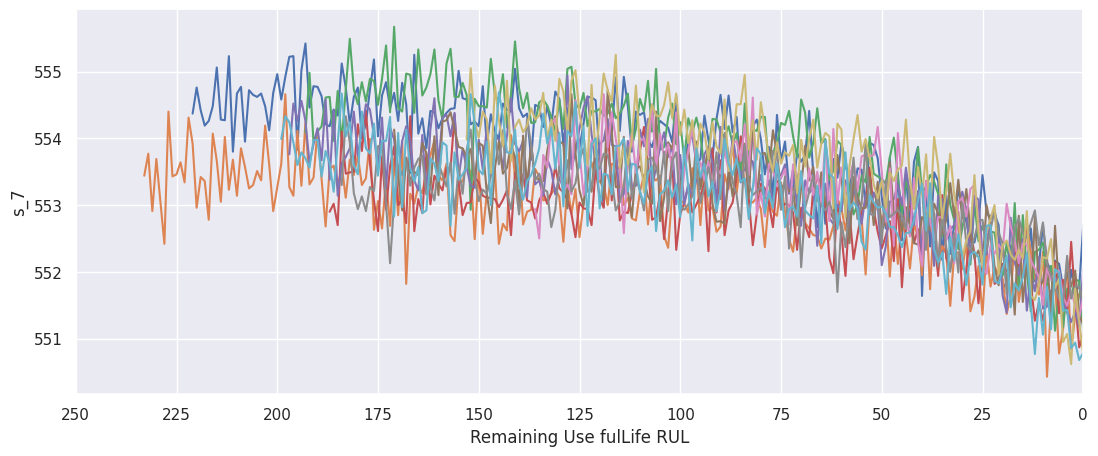

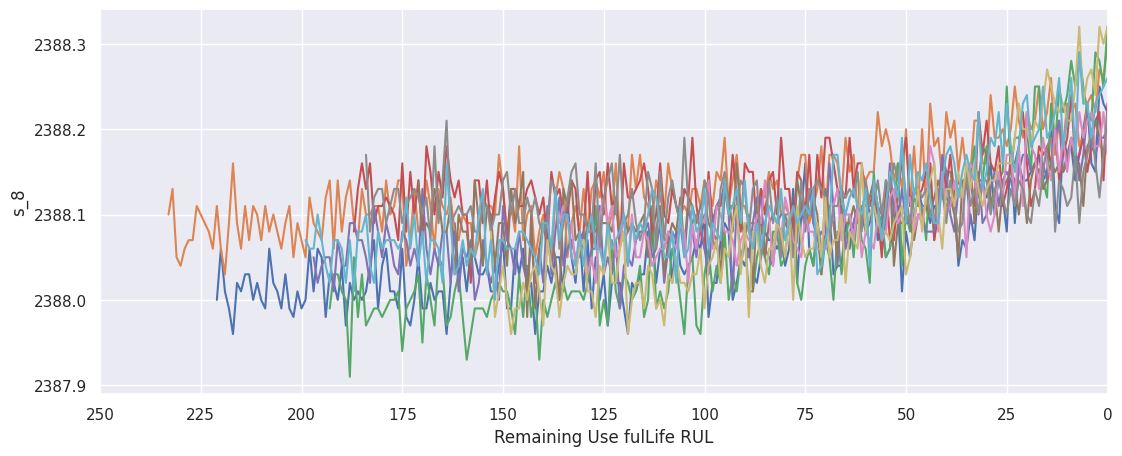

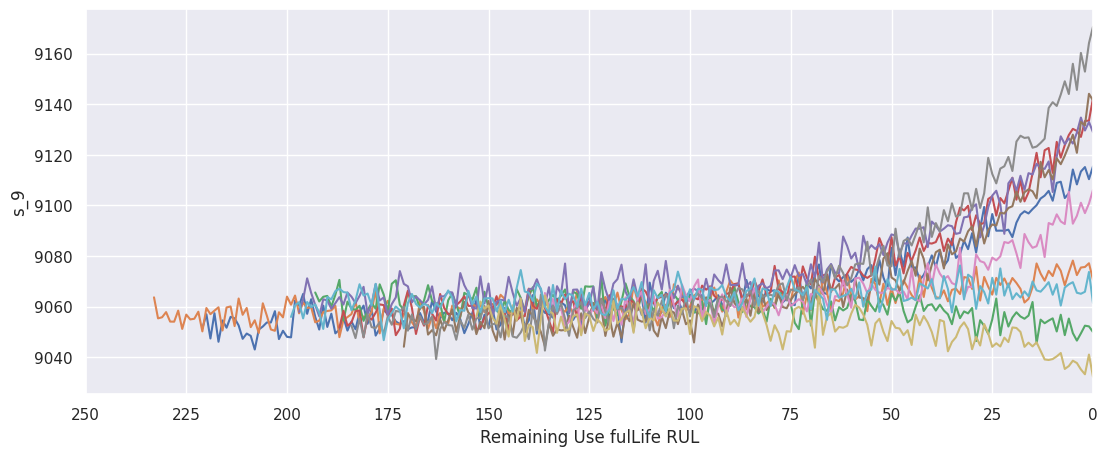

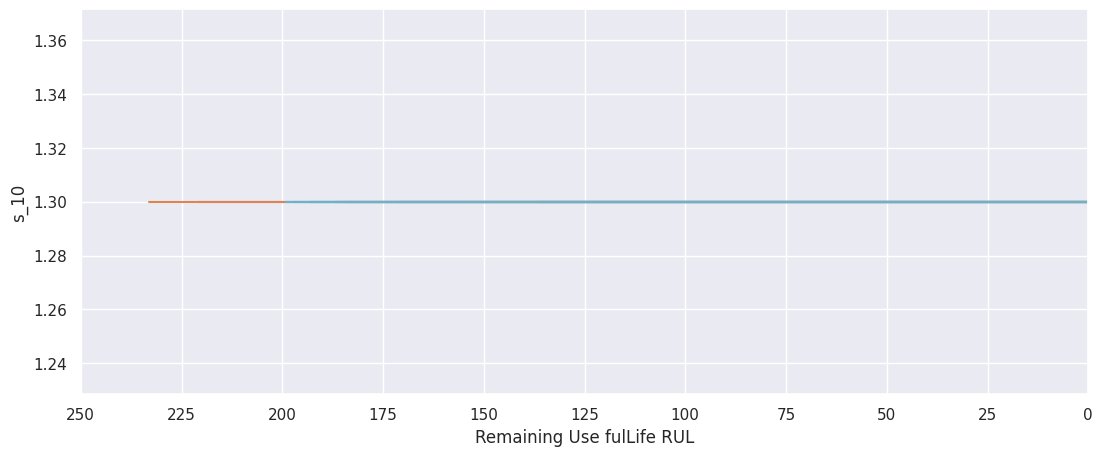

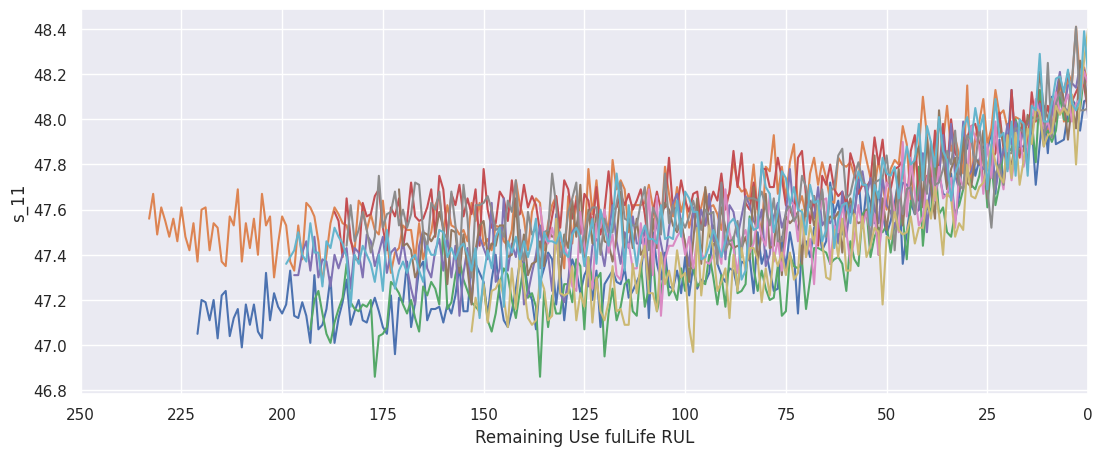

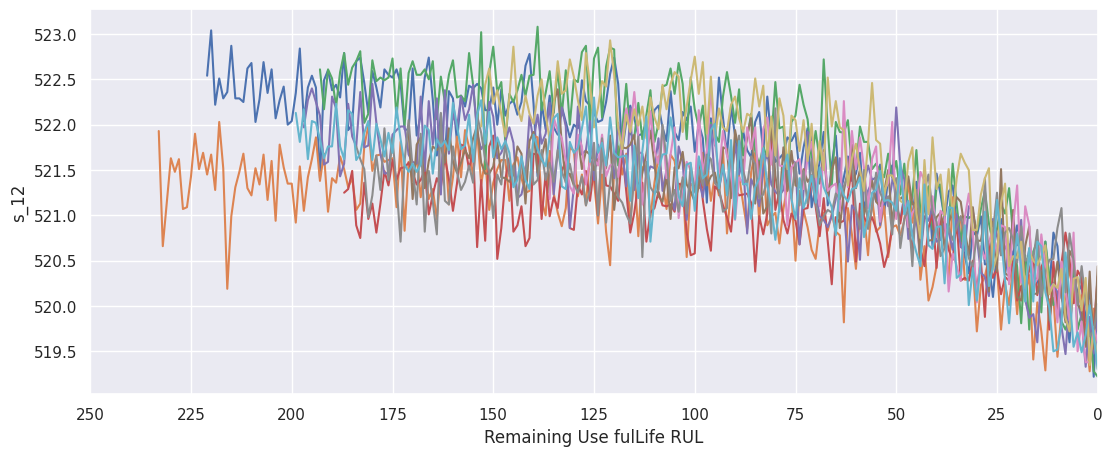

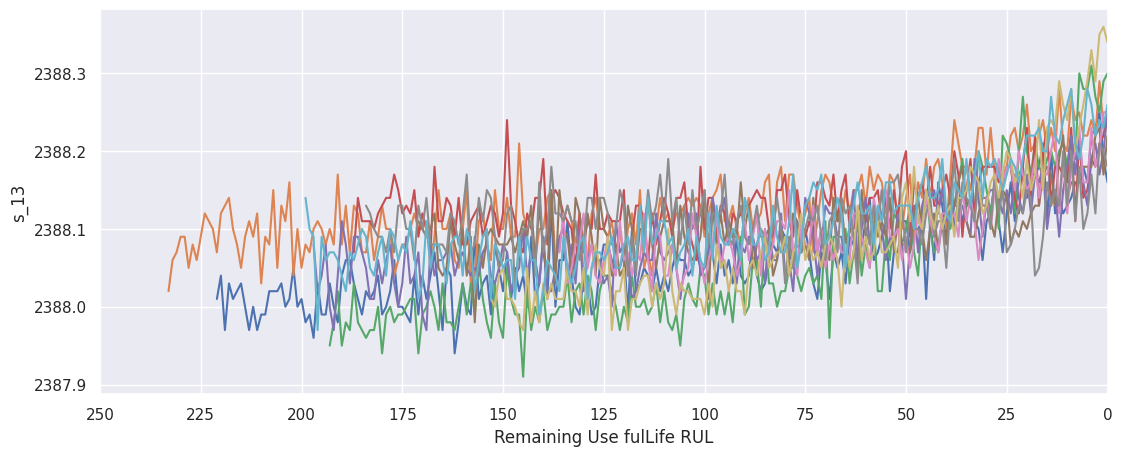

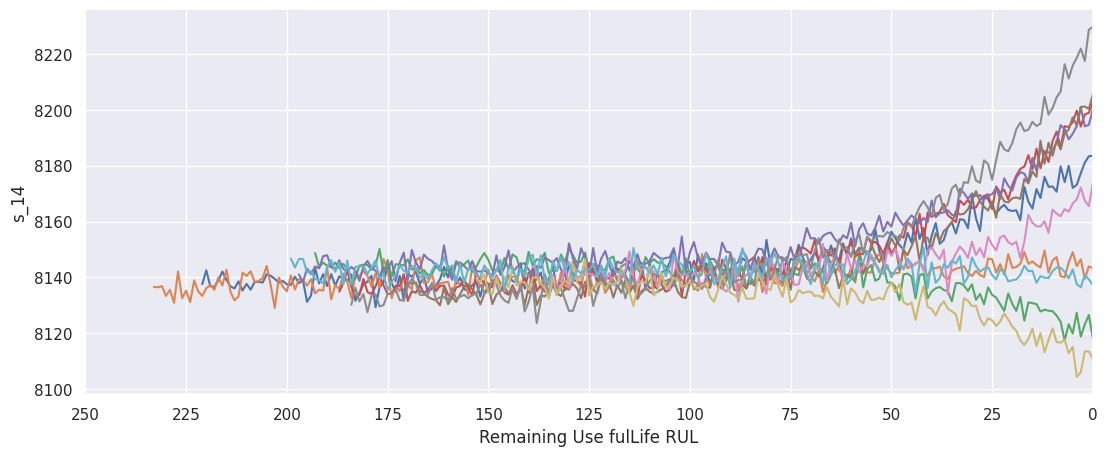

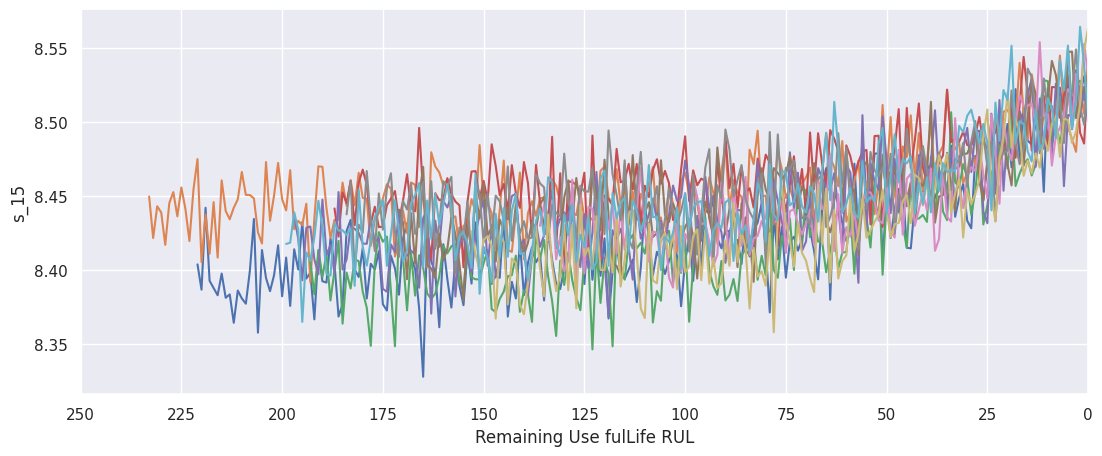

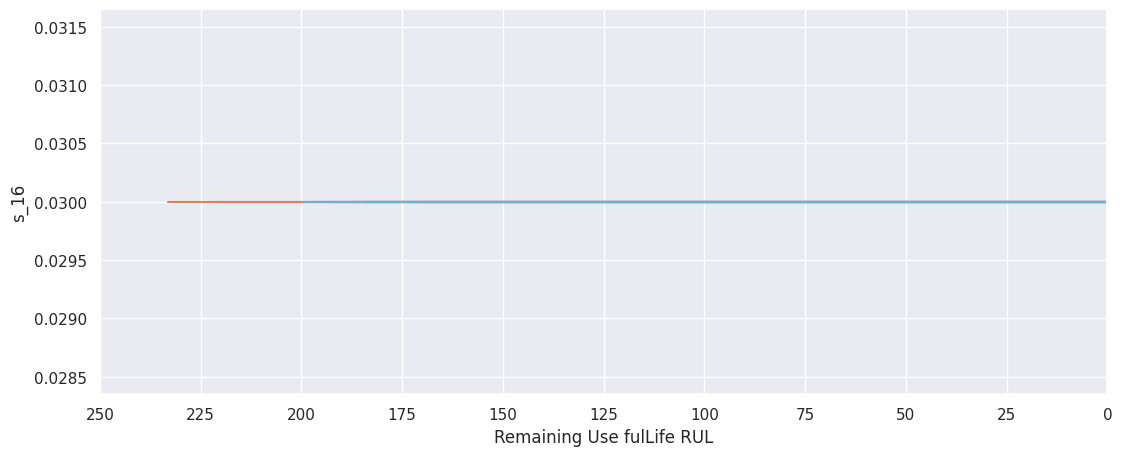

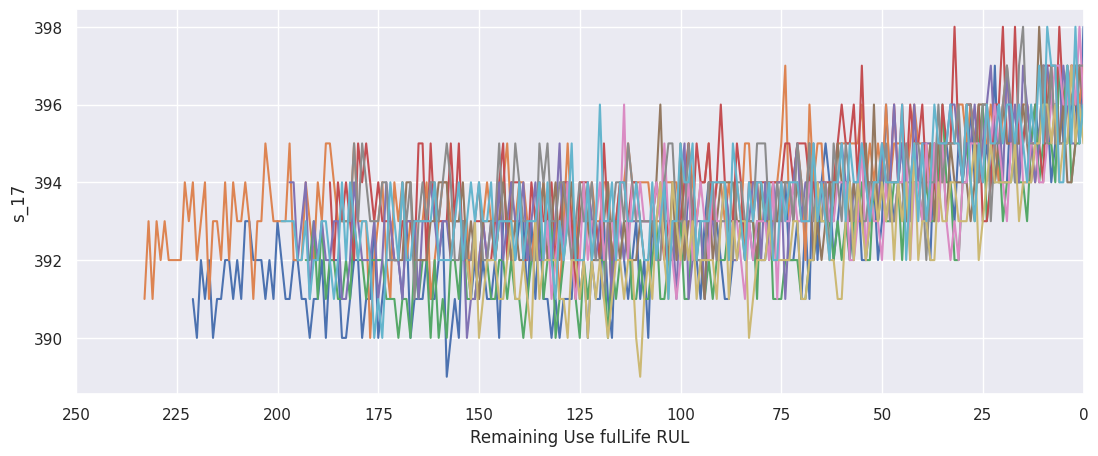

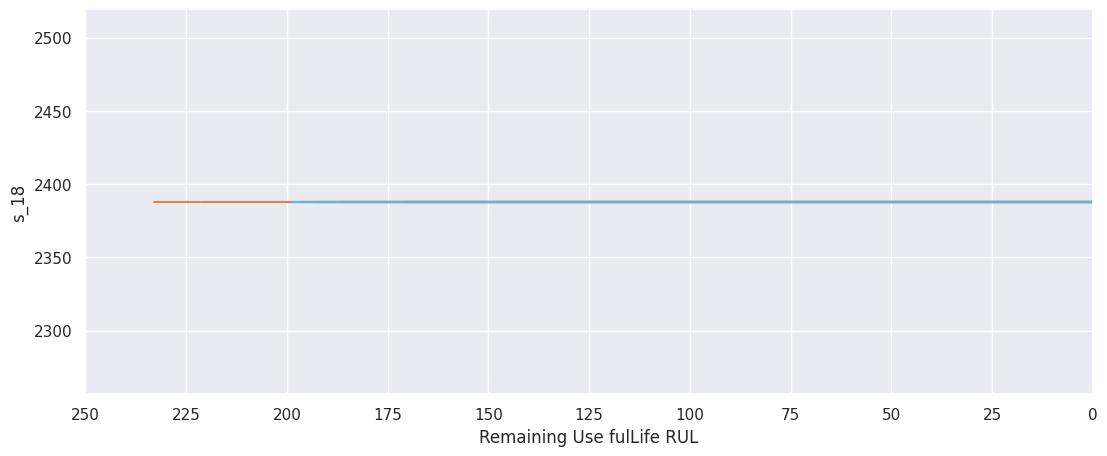

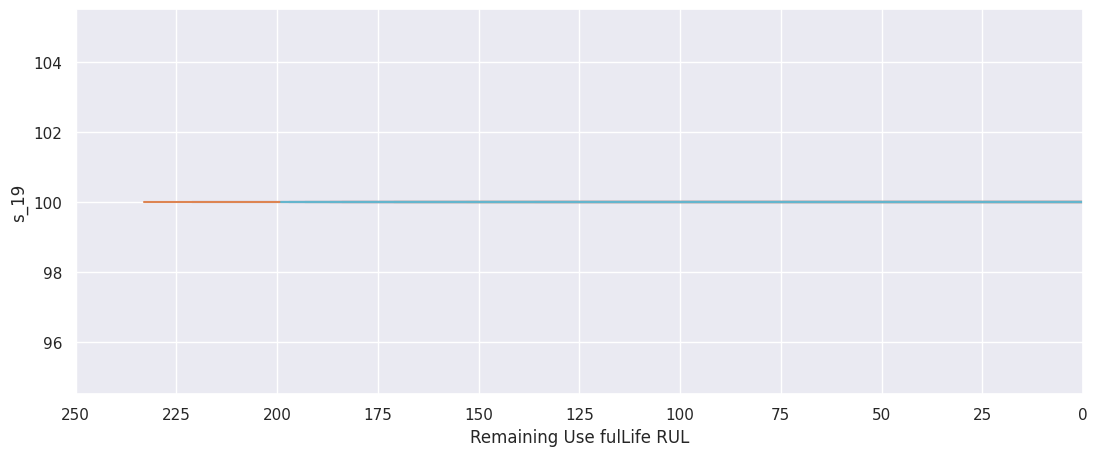

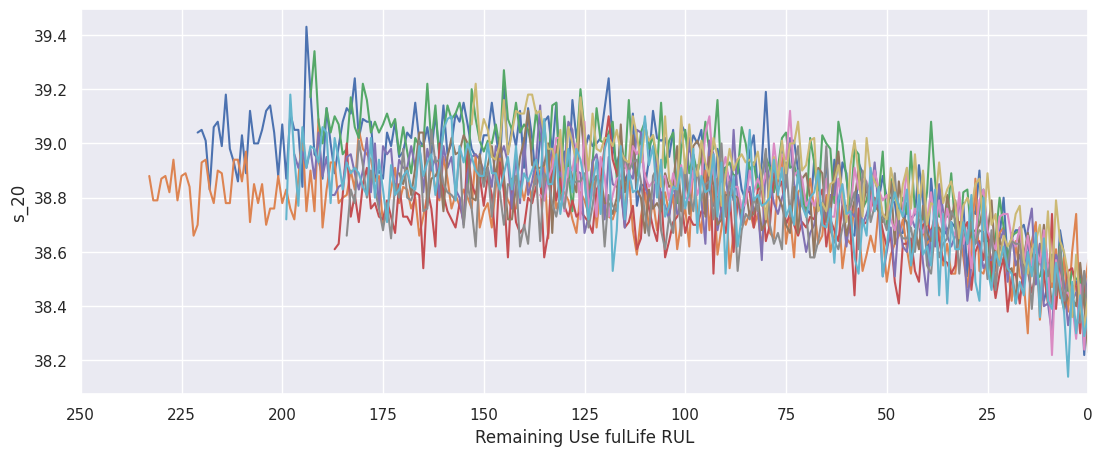

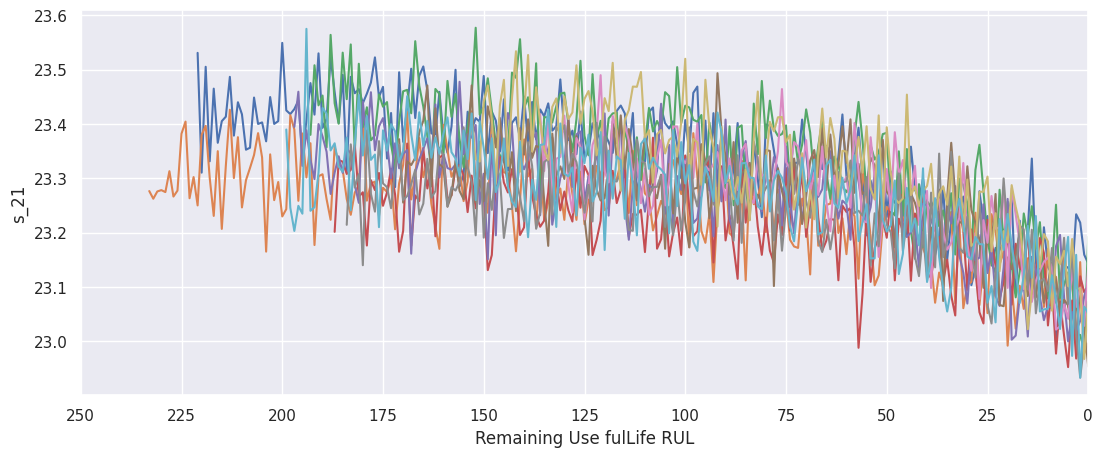

In [ ]:
def plot_sensor(sensor_name):
    plt.figure(figsize=(13,5))
    for i in train['unit_nr'].unique():
        if (i % 10 == 0):  # sólo trazar cada 10 unidad_nr
            plt.plot('RUL', sensor_name,
                     data=train[train['unit_nr']==i])
    plt.xlim(250, 0)  # invertir el eje x para que RUL cuente regresivamente hasta cero
    plt.xticks(np.arange(0, 275, 25))

    plt.ylabel(sensor_name)
    plt.xlabel('Remaining Use fulLife RUL')
    plt.show()

for sensor_name in sensor_names:
    plot_sensor(sensor_name)

Según los gráficos, puede ver que los sensores 1, 5, 6, 10, 16, 18 y 19 no contienen información relacionada con la vida útil restante, ya que los valores de los sensores permanecen constantes a lo largo del tiempo.

Es hora de crear nuestro modelo de referencia que tenga en cuenta todos los sensores que contienen información relacionada con RUL.

## Regresión inicial

In [ ]:
# Primero crea una función de evaluación.
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))

In [ ]:
# elimine columnas no deseadas y divida la variable de destino del conjunto de entrenamiento
drop_sensors = ['s_1','s_5','s_6','s_10','s_16','s_18','s_19']
drop_labels = index_names+setting_names+drop_sensors

X_train = train.drop(drop_labels, axis=1)
y_train = X_train.pop('RUL')

# Dado que los verdaderos valores RUL para el equipo de prueba solo se proporcionan para el último ciclo de tiempo de cada motor
# el conjunto de prueba se divide en subconjuntos para representar el mismo
X_test = test.groupby('unit_nr').last().reset_index().drop(drop_labels, axis=1)


print(X_train.columns)  # comprobar las columnas restantes

Index(['s_2', 's_3', 's_4', 's_7', 's_8', 's_9', 's_11', 's_12', 's_13',
       's_14', 's_15', 's_17', 's_20', 's_21'],
      dtype='object')


In [ ]:
# crear y ajustar modelo
lm = LinearRegression()
lm.fit(X_train, y_train)

# predecir y evaluar
y_hat_train = lm.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = lm.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:44.66819159545438, R2:0.5794486527796744
test set RMSE:31.952633027730382, R2:0.40877368076616405


Tenga en cuenta que el RMSE en el equipo de prueba es más bajo. Esto puede explicarse porque el RUL del conjunto de entrenamiento contiene más muestras de RUL alto en comparación con el conjunto de prueba y el RUL alto no necesariamente se correlaciona con las señales del sensor.

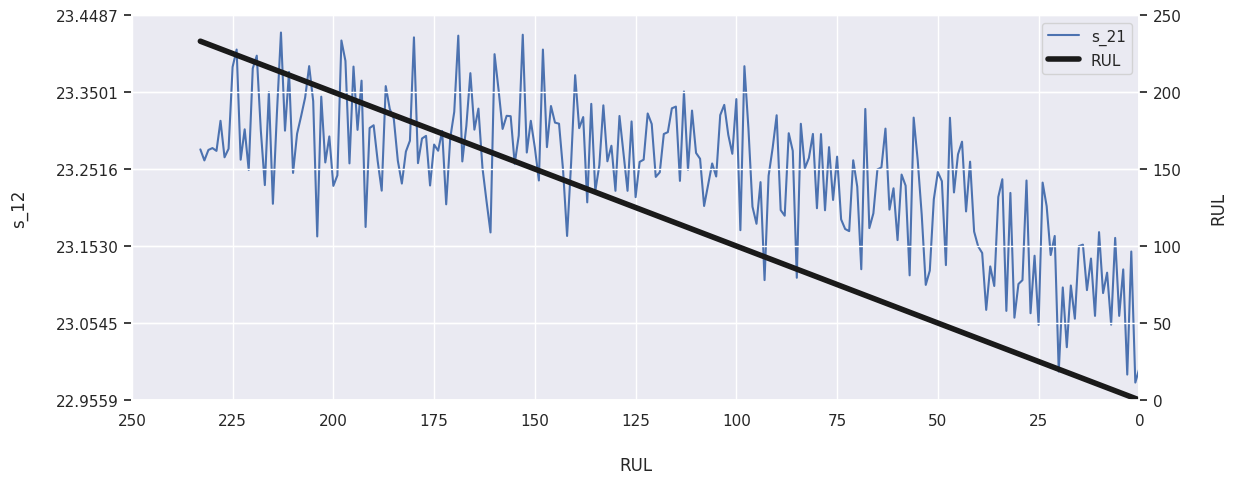

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize=(13,5))

signal = ax1.plot('RUL', 's_21', 'b',
                 data=train.loc[train['unit_nr']==20])
plt.xlim(250, 0)
plt.xticks(np.arange(0, 275, 25))
ax1.set_ylabel('s_12', labelpad=20)
ax1.set_xlabel('RUL', labelpad=20)

ax2 = ax1.twinx()
rul_line = ax2.plot('RUL', 'RUL', 'k', linewidth=4,
                   data=train.loc[train['unit_nr']==20])
ax2.set_ylabel('RUL', labelpad=20)

ax2.set_ylim(0, 250)  # establezca los límites del eje que desea mostrar claramente
ax2.set_yticks(
    np.linspace(ax2.get_ybound()[0], ax2.get_ybound()[1], 6))  # elija un número entero para dividir claramente su eje, en nuestro caso 6
ax1.set_yticks(
    np.linspace(ax1.get_ybound()[0], ax1.get_ybound()[1], 6))  # Aplicar el mismo espacio al otro eje.

lines = signal+rul_line
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc=0)


plt.show()

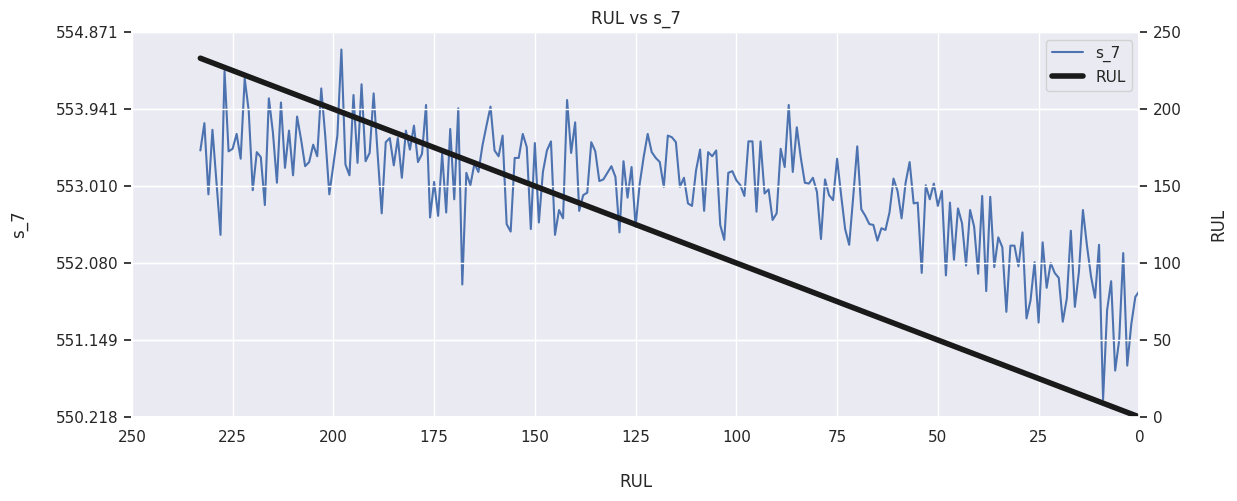

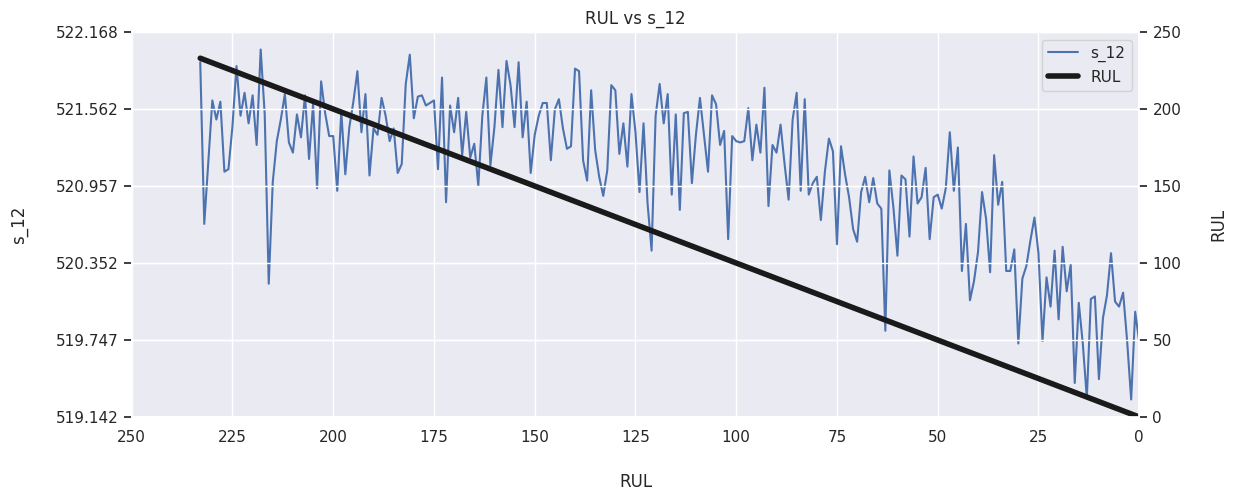

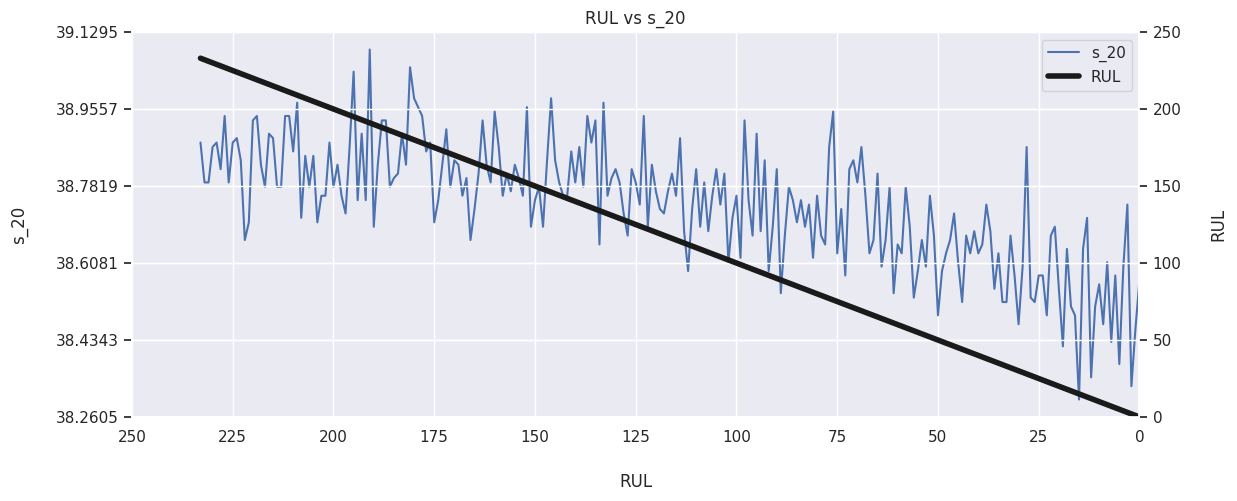

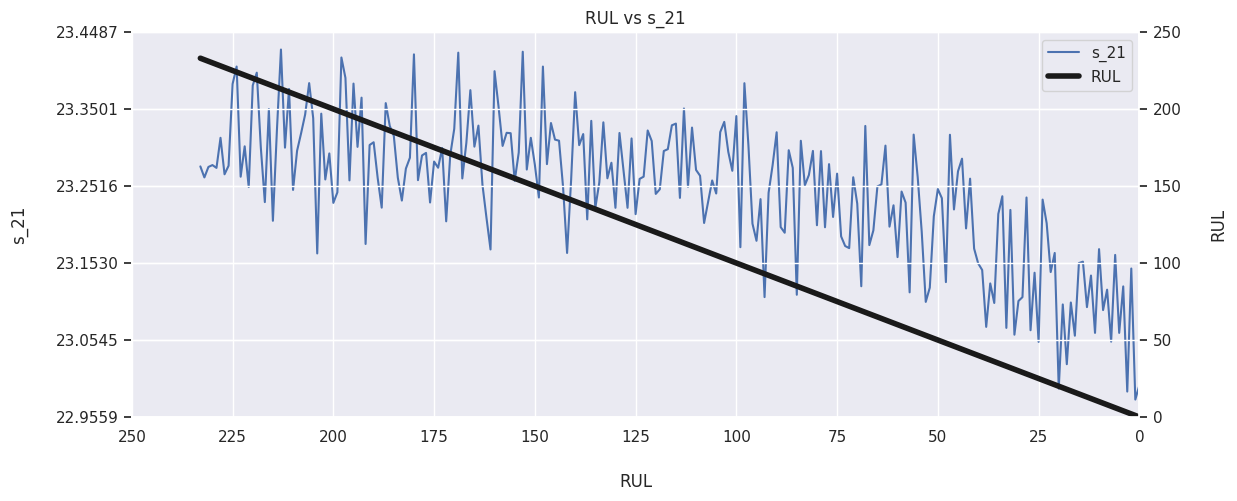

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

sensors = ['s_7', 's_12', 's_20', 's_21']  # Lista de sensores de interés

for sensor in sensors:
    fig, ax1 = plt.subplots(1, 1, figsize=(13, 5))

    signal = ax1.plot('RUL', sensor, 'b',
                      data=train.loc[train['unit_nr'] == 20], label=sensor)
    plt.xlim(250, 0)
    plt.xticks(np.arange(0, 275, 25))
    ax1.set_ylabel(sensor, labelpad=20)
    ax1.set_xlabel('RUL', labelpad=20)

    ax2 = ax1.twinx()
    rul_line = ax2.plot('RUL', 'RUL', 'k', linewidth=4,
                        data=train.loc[train['unit_nr'] == 20], label='RUL')
    ax2.set_ylabel('RUL', labelpad=20)

    ax2.set_ylim(0, 250)  # establecer los límites del eje que desea mostrar claramente
    ax2.set_yticks(
        np.linspace(ax2.get_ybound()[0], ax2.get_ybound()[1], 6))  # elija un número entero para dividir claramente su eje, en nuestro caso 6
    ax1.set_yticks(
        np.linspace(ax1.get_ybound()[0], ax1.get_ybound()[1], 6))  # Aplicar el mismo espacio al otro eje.

    lines = signal + rul_line
    labels = [line.get_label() for line in lines]
    ax1.legend(lines, labels, loc=0)

    plt.title(f'RUL vs {sensor}')
    plt.show()


Para el ciclo 250 - 100 (más o menos), la señal media del sensor es bastante estable, mientras que el RUL calculado está disminuyendo.
Por debajo de 100 ciclos, tanto la señal media del sensor como el RUL calculado están disminuyendo. En esencia, la mayor correlación entre la señal del sensor y el RUL calculado en valores de RUL más bajos facilita que el algoritmo produzca predicciones más precisas.


In [ ]:
# datos de preparación
# elimine columnas no deseadas y divida la variable de destino del conjunto de entrenamiento
drop_sensors = ['s_1','s_5','s_16','s_18','s_19']  # por el momento mantendremos s_6 y s_10
drop_labels = index_names+setting_names+drop_sensors
remaining_sensors = ['s_2', 's_3', 's_4', 's_6', 's_7', 's_8', 's_9', 's_10',
       's_11', 's_12', 's_13', 's_14', 's_15', 's_17', 's_20', 's_21']


X_train = train.drop(drop_labels, axis=1)
y_train = X_train.pop('RUL')
#y_train_clipped = y_train.clip(upper=125)  # apply RUL clipping from earlier posts

# Dado que los verdaderos valores RUL para el equipo de prueba solo se proporcionan para el último ciclo de tiempo de cada motor,
# el conjunto de pruebas se representa en subconjuntos
X_test = test.groupby('unit_nr').last().reset_index().drop(drop_labels, axis=1)

In [ ]:
# importando el módulo necesario
from sklearn.ensemble import RandomForestRegressor

# random forest
rf = RandomForestRegressor(n_estimators=90, max_features="sqrt", random_state=42)
#rf.fit(X_train, y_train_clipped)
rf.fit(X_train, y_train)


# predecir y evaluar
y_hat_train = rf.predict(X_train)
#evaluate(y_train_clipped, y_hat_train, 'train')
evaluate(y_train, y_hat_train, 'train')

y_hat_test = rf.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:15.461981867195902, R2:0.9496090428974592
test set RMSE:33.031185096646, R2:0.3681866952265017


In [ ]:
# realizar algunas comprobaciones en el diseño de un ÚNICO árbol
print(rf.estimators_[5].tree_.max_depth)  # comprobar cuántos nodos hay en el camino más largo
rf.estimators_[5].tree_.n_node_samples    # comprobar cuántas muestras hay en los últimos nodos

36


array([13025,  8934,  8135, ...,     1,     1,     1], dtype=int64)

In [ ]:
# bosque aleatorio modificado
rf = RandomForestRegressor(n_estimators=90, max_features="sqrt", random_state=42,
                           max_depth=8, min_samples_leaf=50)
#rf.fit(X_train, y_train_clipped)
rf.fit(X_train, y_train)

# predecir y evaluar
y_hat_train = rf.predict(X_train)
#evaluate(y_train_clipped, y_hat_train, 'train')
evaluate(y_train, y_hat_train, 'train')

y_hat_test = rf.predict(X_test)
evaluate(y_test, y_hat_test)
#el valor del rmse es mayor en el conjunto de entrenamiento pero el r2 es menor

train set RMSE:40.48134097427551, R2:0.6545922571158183
test set RMSE:30.64689064584838, R2:0.456107220684996


In [ ]:
#y_train_discretized = pd.cut(y_train_clipped, bins=4, labels=False)
y_train_discretized = pd.cut(y_train, bins=4, labels=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Entrenar el modelo Random Forest
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train_discretized)


RandomForestClassifier()

In [ ]:
# Obtener la importancia de las características la importancia de los sensores,
importances = clf.feature_importances_
print(importances)
# Imprimir las características
feature_names = X_train.columns
print(feature_names)

[0.05608014 0.05425152 0.10190447 0.00201219 0.0801764  0.03668381
 0.09772653 0.         0.12591589 0.09335332 0.03914489 0.08512455
 0.07727738 0.02557933 0.05103478 0.0737348 ]
Index(['s_2', 's_3', 's_4', 's_6', 's_7', 's_8', 's_9', 's_10', 's_11', 's_12',
       's_13', 's_14', 's_15', 's_17', 's_20', 's_21'],
      dtype='object')


In [ ]:
# Crear un DataFrame de las características y su importancia
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
print(feature_importances)

   feature  importance
8     s_11    0.125916
2      s_4    0.101904
6      s_9    0.097727
9     s_12    0.093353
11    s_14    0.085125
4      s_7    0.080176
12    s_15    0.077277
15    s_21    0.073735
0      s_2    0.056080
1      s_3    0.054252
14    s_20    0.051035
10    s_13    0.039145
5      s_8    0.036684
13    s_17    0.025579
3      s_6    0.002012
7     s_10    0.000000


<ipython-input-22-4c396218c29c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances, palette='viridis')


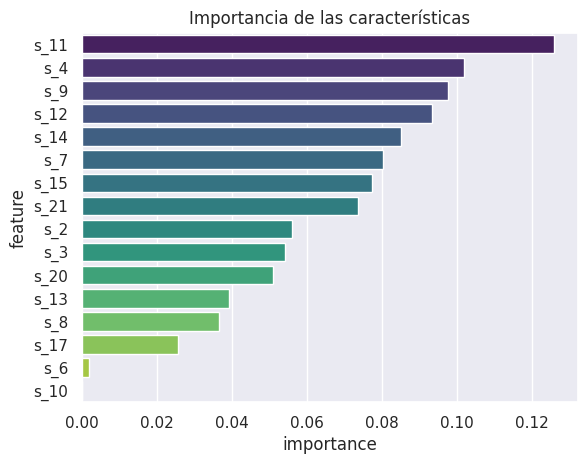

In [ ]:
# Visualizar la importancia de las características
plt.figure()
sns.barplot(x='importance', y='feature', data=feature_importances, palette='viridis')
plt.title('Importancia de las características')
plt.show()

In [ ]:
print(X_train.columns)
X_train = X_train.drop(columns=['s_6', 's_10', 's_17','s_8','s_13','s_20','s_21', 's_2','s_3'])
#y_train_clipped = test.drop(columns=['s_6', 's_10'])

#y_train = test.drop(columns=['s_6', 's_10'])

Index(['s_2', 's_3', 's_4', 's_6', 's_7', 's_8', 's_9', 's_10', 's_11', 's_12',
       's_13', 's_14', 's_15', 's_17', 's_20', 's_21'],
      dtype='object')


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Entrenar el modelo Random Forest
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train_discretized)

RandomForestClassifier()

In [ ]:
# Obtener la importancia de las características la importancia de los sensores,
importances = clf.feature_importances_
print(importances)
# Imprimir las características
feature_names = X_train.columns
print(feature_names)

[0.1565868  0.13245788 0.14347981 0.14807499 0.15054513 0.13185785
 0.13699753]
Index(['s_4', 's_7', 's_9', 's_11', 's_12', 's_14', 's_15'], dtype='object')


In [ ]:
# Crear un DataFrame de las características y su importancia
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
print(feature_importances)

  feature  importance
0     s_4    0.156587
4    s_12    0.150545
3    s_11    0.148075
2     s_9    0.143480
6    s_15    0.136998
1     s_7    0.132458
5    s_14    0.131858


<ipython-input-27-4c396218c29c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances, palette='viridis')


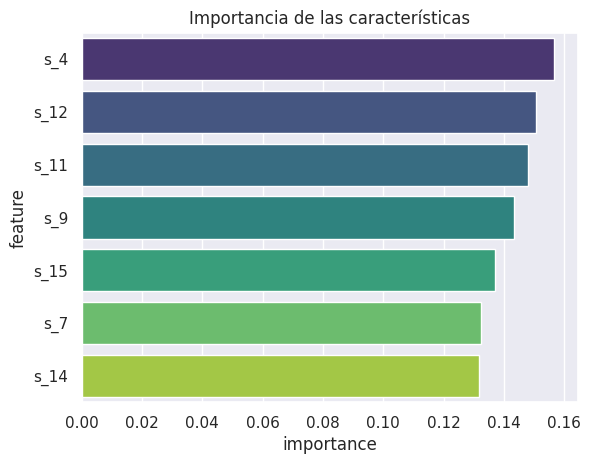

In [ ]:
# Visualizar la importancia de las características
plt.figure()
sns.barplot(x='importance', y='feature', data=feature_importances, palette='viridis')
plt.title('Importancia de las características')
plt.show()

In [ ]:
# Determinar el índice de la característica más importante
most_important_feature_index = 2
# Buscar el árbol que tiene la característica más importante en su nodo raíz
target_tree_index = None
for i, estimator in enumerate(clf.estimators_):
  if estimator.tree_.feature[0] == most_important_feature_index:
    target_tree_index = i
    break

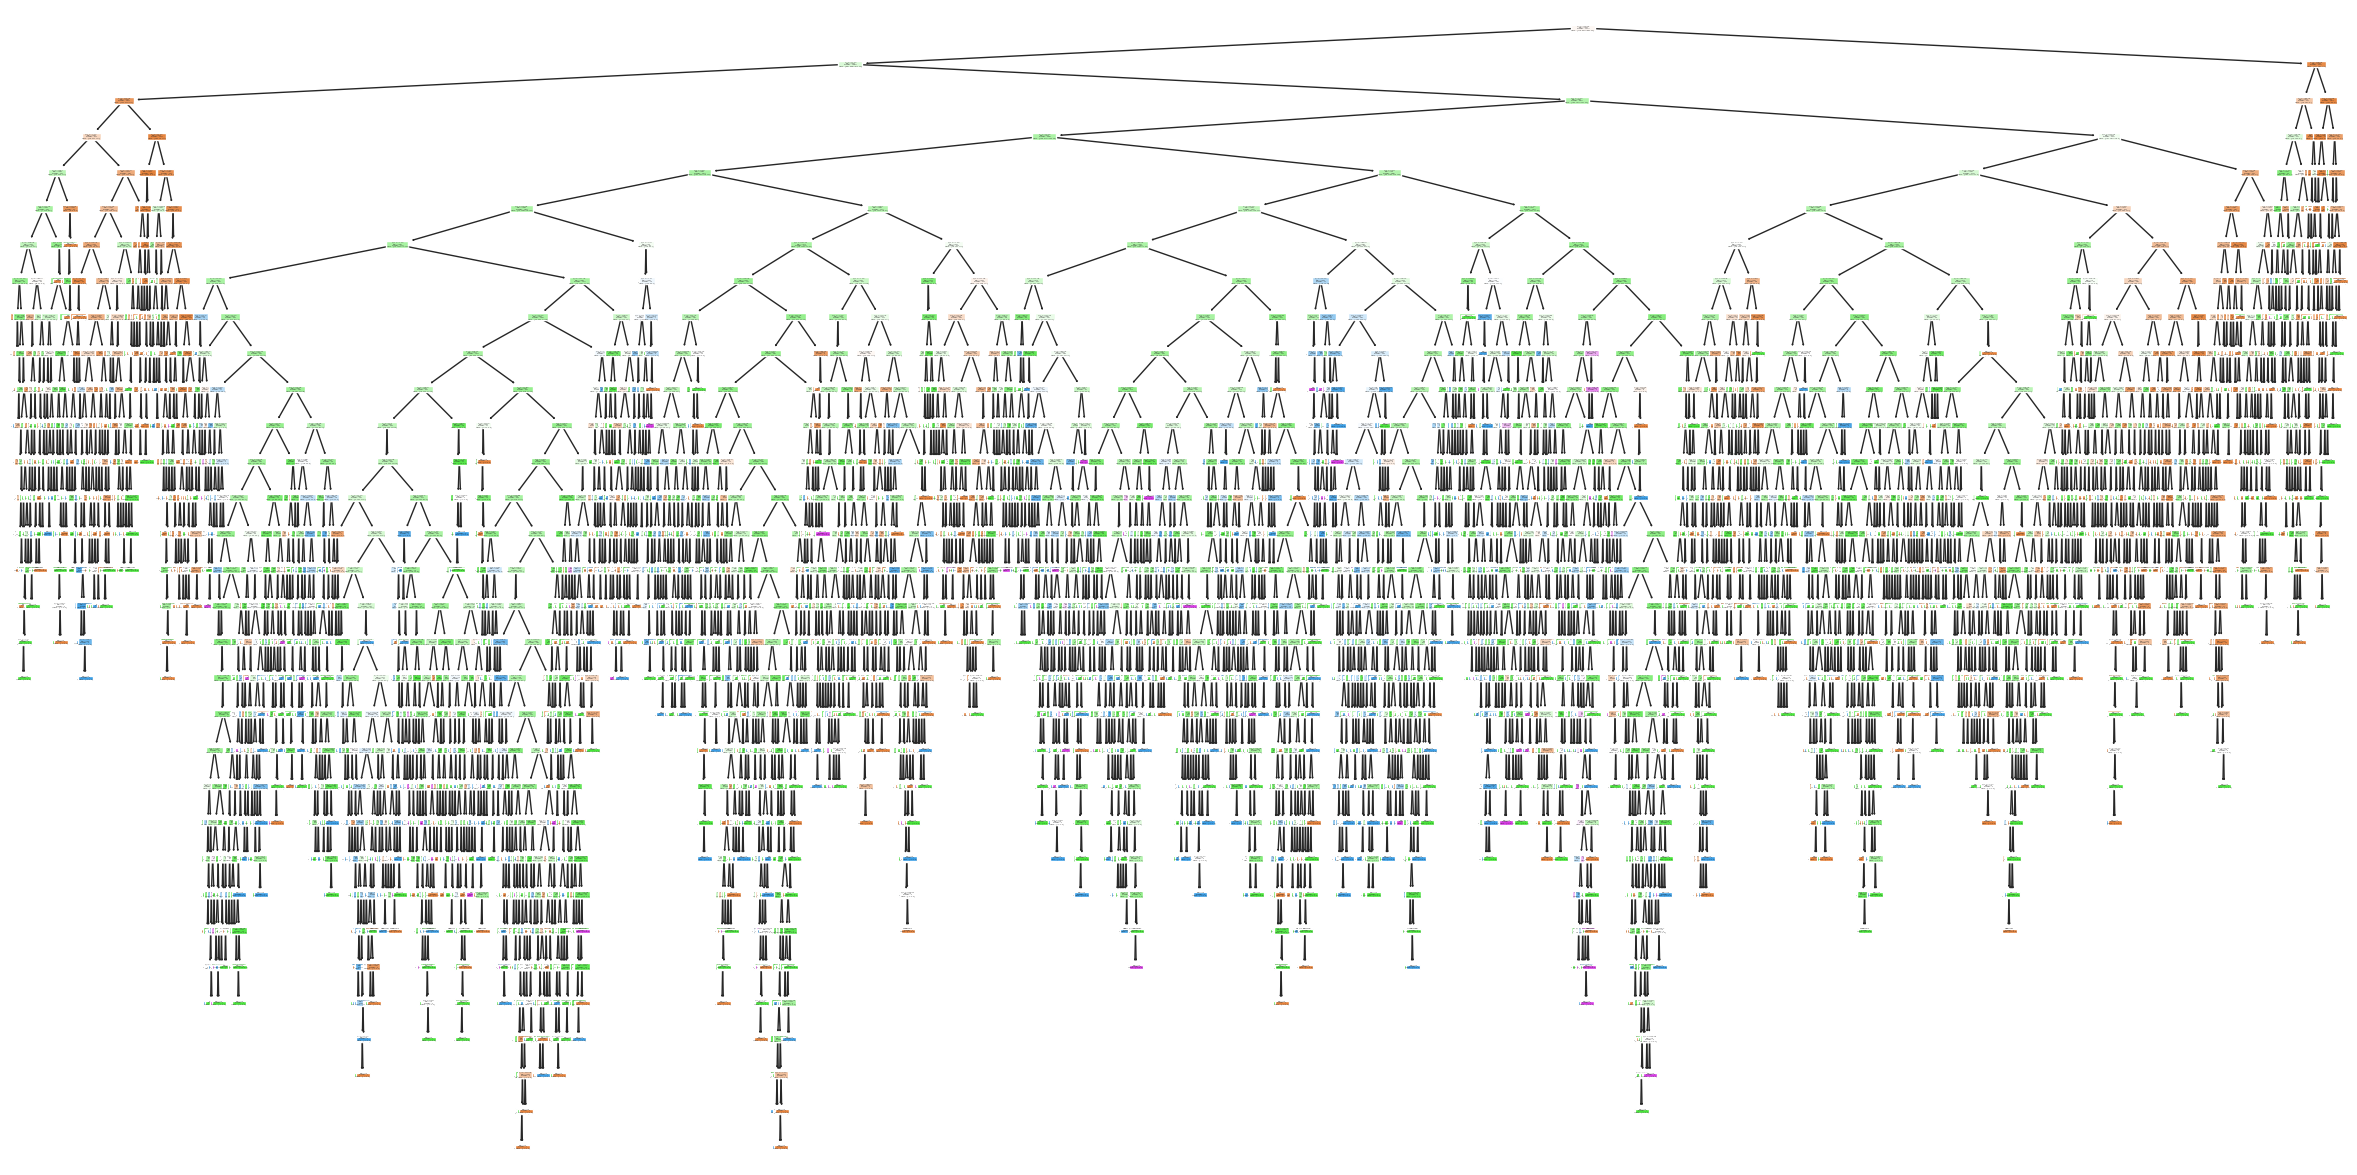

In [ ]:
# Ploteamos el árbol de decisión
from sklearn.tree import plot_tree
plt.figure(figsize=(30, 15))
plot_tree(clf.estimators_[target_tree_index], feature_names=feature_names, filled=True)
plt.show()


ahora probaremos en el paquete de testeo

In [ ]:
X_test=X_test.drop(columns=['s_6', 's_10', 's_17','s_8','s_13','s_20','s_21', 's_2','s_3'])

In [ ]:
# Obtener las probabilidades de las clases positivas
y_prob = clf.predict_proba(X_test)[:,:]


In [ ]:
# Obtener las predicciones del modelo
y_pred = clf.predict(X_test)

In [ ]:
# Importar la función accuracy_score desde sklearn.metrics
from sklearn.metrics import accuracy_score

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

Precisión del modelo: 0.00


In [ ]:
y_prob

array([[0.05, 0.6 , 0.2 , 0.15],
       [0.05, 0.65, 0.3 , 0.  ],
       [0.88, 0.12, 0.  , 0.  ],
       [0.37, 0.49, 0.14, 0.  ],
       [0.45, 0.49, 0.06, 0.  ],
       [0.12, 0.67, 0.2 , 0.01],
       [0.16, 0.62, 0.17, 0.05],
       [0.66, 0.31, 0.03, 0.  ],
       [0.16, 0.67, 0.17, 0.  ],
       [0.25, 0.6 , 0.14, 0.01],
       [0.65, 0.33, 0.02, 0.  ],
       [0.66, 0.3 , 0.03, 0.01],
       [0.36, 0.58, 0.05, 0.01],
       [0.27, 0.43, 0.3 , 0.  ],
       [0.04, 0.81, 0.11, 0.04],
       [0.06, 0.71, 0.2 , 0.03],
       [1.  , 0.  , 0.  , 0.  ],
       [0.62, 0.37, 0.01, 0.  ],
       [0.16, 0.6 , 0.22, 0.02],
       [1.  , 0.  , 0.  , 0.  ],
       [0.97, 0.03, 0.  , 0.  ],
       [0.15, 0.72, 0.08, 0.05],
       [0.02, 0.7 , 0.19, 0.09],
       [0.96, 0.04, 0.  , 0.  ],
       [0.21, 0.63, 0.11, 0.05],
       [0.18, 0.77, 0.05, 0.  ],
       [0.06, 0.76, 0.18, 0.  ],
       [0.46, 0.39, 0.15, 0.  ],
       [0.28, 0.58, 0.14, 0.  ],
       [0.42, 0.55, 0.03, 0.  ],
       [1.

In [ ]:
# Ploteamos el árbol de decisión
y_train_discretized.unique()

array([2, 1, 0, 3])

In [ ]:
X_train

s_4     s_7      s_9   s_11    s_12     s_14    s_15
0      1400.60  554.36  9046.19  47.47  521.66  8138.62  8.4195
1      1403.14  553.75  9044.07  47.49  522.28  8131.49  8.4318
2      1404.20  554.26  9052.94  47.27  522.42  8133.23  8.4178
3      1401.87  554.45  9049.48  47.13  522.86  8133.83  8.3682
4      1406.22  554.00  9055.15  47.28  522.19  8133.80  8.4294
...        ...     ...      ...    ...     ...      ...     ...
20626  1428.63  551.43  9065.52  48.07  519.49  8137.60  8.4956
20627  1433.58  550.86  9065.11  48.04  519.68  8136.50  8.5139
20628  1428.18  550.94  9065.90  48.09  520.01  8141.05  8.5646
20629  1426.53  550.68  9073.72  48.39  519.67  8139.29  8.5389
20630  1432.14  550.79  9061.48  48.20  519.30  8137.33  8.5036

[20631 rows x 7 columns]

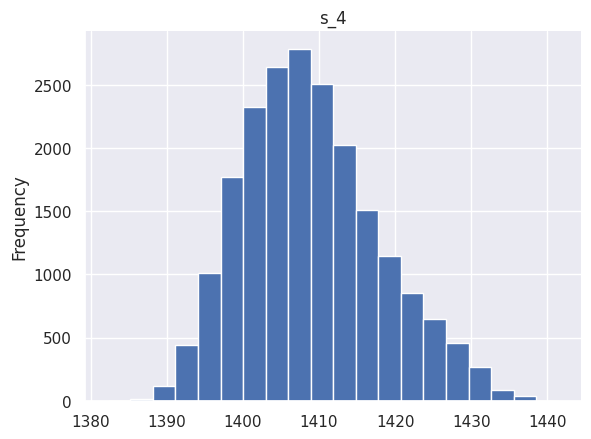

In [ ]:
# @title s_4

from matplotlib import pyplot as plt
X_train['s_4'].plot(kind='hist', bins=20, title='s_4')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
y_train.unique()

array([191, 190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 180, 179,
       178, 177, 176, 175, 174, 173, 172, 171, 170, 169, 168, 167, 166,
       165, 164, 163, 162, 161, 160, 159, 158, 157, 156, 155, 154, 153,
       152, 151, 150, 149, 148, 147, 146, 145, 144, 143, 142, 141, 140,
       139, 138, 137, 136, 135, 134, 133, 132, 131, 130, 129, 128, 127,
       126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114,
       113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101,
       100,  99,  98,  97,  96,  95,  94,  93,  92,  91,  90,  89,  88,
        87,  86,  85,  84,  83,  82,  81,  80,  79,  78,  77,  76,  75,
        74,  73,  72,  71,  70,  69,  68,  67,  66,  65,  64,  63,  62,
        61,  60,  59,  58,  57,  56,  55,  54,  53,  52,  51,  50,  49,
        48,  47,  46,  45,  44,  43,  42,  41,  40,  39,  38,  37,  36,
        35,  34,  33,  32,  31,  30,  29,  28,  27,  26,  25,  24,  23,
        22,  21,  20,  19,  18,  17,  16,  15,  14,  13,  12,  1

In [ ]:
!apt-get install graphviz
!pip install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
from subprocess import call
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz
import os


In [ ]:
# Crear y ajustar un modelo RandomForestClassifier
rf = RandomForestClassifier() # Inicializar el modelo de bosque aleatorio
rf.fit(X_train, y_train_discretized) # Suponiendo que X_train e y_train ya estén definidos

RandomForestClassifier()

In [ ]:
def export_rf_visual(estimator, file_name, dpi):
    # Exportar el árbol de decisión a un archivo .dot
    export_graphviz(estimator,
                    out_file=f'{file_name}.dot',
                    feature_names=X_train.columns, # nombres de las columnas
                    filled=True,
                    special_characters=True,
                    rotate=True)

    # Convertir el archivo .dot a .png
    call(['dot', '-Tpng', f'{file_name}.dot', '-o', f'{file_name}.png', f'-Gdpi={dpi}'])

    print(f'estimator successfully exported to: {file_name}.png')
    return



In [ ]:
# Crear y ajustar un modelo RandomForestClassifier
rf = RandomForestClassifier() # Inicializar el modelo de bosque aleatorio
rf.fit(X_train, y_train_discretized) # Suponiendo que X_train e y_train ya estén definidos


# Exportar y visualizar en Google Colab
file_name = 'tree_FD003'
export_rf_visual(rf.estimators_[2], file_name, dpi=400)



# Mostrar la imagen resultante
Image(filename=f'{file_name}.png')

In [ ]:
drop_sensors = ['s_1','s_5', 's_9', 's_14', 's_16','s_18','s_19']
drop_labels = index_names+setting_names+drop_sensors
remaining_sensors = ['s_2', 's_3', 's_4', 's_6', 's_7', 's_8', 's_10',
       's_11', 's_12', 's_13', 's_15', 's_17', 's_20', 's_21']

X_train = train.drop(drop_labels, axis=1)
y_train = X_train.pop('RUL')
#y_train_clipped = y_train.clip(upper=125)

X_test = test.groupby('unit_nr').last().reset_index().drop(drop_labels, axis=1)

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

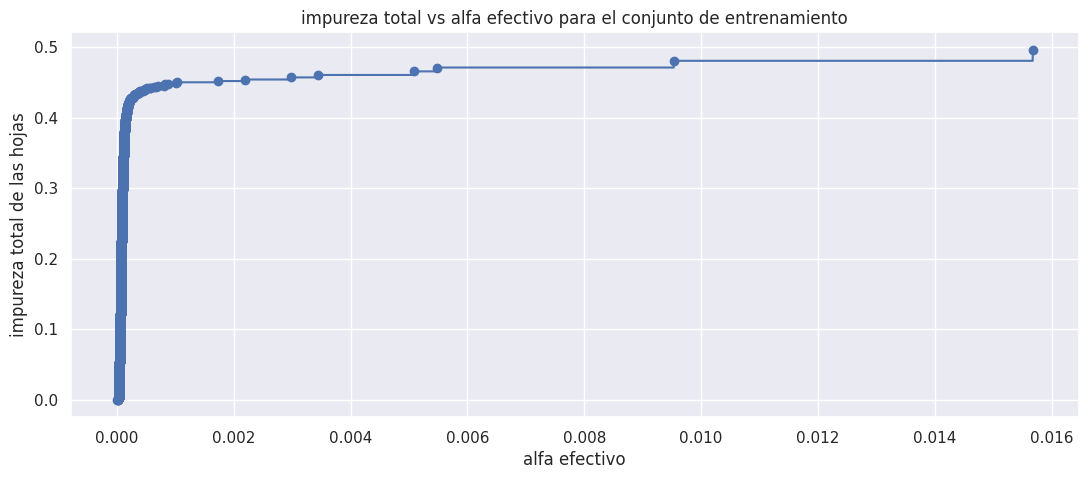

In [ ]:
# encontrar ccp_alphas para amenorar las ramas
path = rf.estimators_[5].cost_complexity_pruning_path(X_train, y_train_discretized)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots(figsize=(13,5))

# el nodo raíz del árbol (indexado con [:-1]) se deja fuera del análisis, ya que sin él no habría árbol
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("alfa efectivo")
ax.set_ylabel("impureza total de las hojas")
ax.set_title("impureza total vs alfa efectivo para el conjunto de entrenamiento")
plt.show()

Las disminuciones de impurezas normalmente se calculan para un único árbol de decisión. Entonces, primero extraigamos los datos requeridos de un solo árbol.

In [ ]:
rf_dict = {
    'id_node': list(range(rf.estimators_[5].tree_.node_count)),
    'impurity': rf.estimators_[5].tree_.impurity,
    'samples': rf.estimators_[5].tree_.n_node_samples,
    'id_left_child': rf.estimators_[5].tree_.children_left,
    'id_right_child': rf.estimators_[5].tree_.children_right
}

impurity_df = pd.DataFrame(rf_dict)
print(impurity_df.shape)
impurity_df.head(10)

(7601, 5)


id_node  impurity  samples  id_left_child  id_right_child
0        0  0.623835    13073              1            6958
1        1  0.625864     9514              2            6793
2        2  0.612344     8777              3            6176
3        3  0.607252     7759              4            5051
4        4  0.586918     6242              5            2994
5        5  0.588406     3555              6            2223
6        6  0.569850     2660              7             356
7        7  0.569504      424              8             341
8        8  0.562859      408              9             188
9        9  0.575017      235             10             167

In [ ]:
impurity_df['impurity_decrease'] = np.nan
samples_total = rf.estimators_[5].tree_.node_count

for idx in impurity_df.index[1:]:  # skip the first node, there aren't any splits prior to it
    if impurity_df.iloc[idx]['id_left_child'] == -1:
        continue  # we can't calculeate impurity decrease for leave nodes, as they no longer split
    else:
        impurity_P, samples_P = impurity_df.iloc[idx][['impurity', 'samples']]
        id_L, id_R = impurity_df.iloc[idx][['id_left_child', 'id_right_child']].astype(int)
        impurity_L, samples_L = impurity_df.iloc[id_L][['impurity', 'samples']]
        impurity_R, samples_R = impurity_df.iloc[id_R][['impurity', 'samples']]

        impurity_decrease = samples_P / samples_total * (
            impurity_P - samples_R / samples_P * impurity_R -
            samples_L / samples_P * impurity_L
            )
        impurity_df.at[idx, 'impurity_decrease'] = impurity_decrease


Es mejor visualizar el resultado para tener una idea de los valores adecuados para min_impurity_decrease.

<Axes: ylabel='Frequency'>

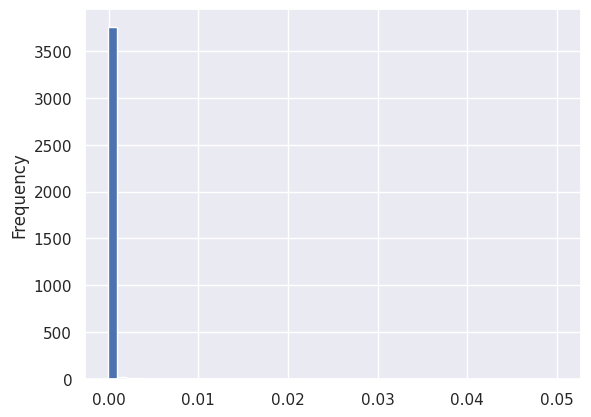

In [ ]:
impurity_df['impurity_decrease'].plot(kind='hist', bins=50)

La disminución de impurezas está muy sesgada hacia la derecha, esto puede explicarse porque los primeros nodos del árbol contribuyen en gran medida a la disminución del error. La verificación de los descriptivos muestra que el 25 % de los valores para la disminución de impurezas se encuentran por debajo de 14,59, lo que parece un límite superior adecuado para el parámetro min_impurity_decrease.

In [ ]:
max_depth = [None] + list(range(3, 33, 3))  # max depth of the first RF was 33, I don't expect we need bigger depth
min_samples_leaf = list(range(1, 102, 10))  # with crude tweaking we set this to 50, for grid search I'll allow double
min_impurity_decrease = list(np.arange(0,147)/10)
ccp_alpha = list(np.round(np.linspace(0, 2, 81), decimals=3))

parameters = {
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_impurity_decrease': min_impurity_decrease,
    'ccp_alpha': ccp_alpha
}

tuning_options = len(max_depth) * len(min_samples_leaf) * len(min_impurity_decrease) * len(ccp_alpha)
print(tuning_options)

1440747


Tenga en cuenta que si quisiéramos probar todas las combinaciones posibles, tendríamos que montar más de 1,5 millones de modelos. Una tarea tediosa. Afortunadamente, aplicar Randomsearch seleccionando al azar 60 combinaciones únicas debería acercarte al 95% de la solución óptima [8].

Aumentar el número de iteraciones aumenta la probabilidad de encontrar una mejor solución. Además de utilizar Randomsearch, prefiero mantener baja la cantidad de árboles para acelerar los tiempos de entrenamiento. Esta combinación permite una búsqueda relativamente rápida.

Ejecuté la búsqueda un par de veces y elegí la configuración con mejor rendimiento. Hay una cosa más que discutir antes de mostrar el código: necesitamos crear conjuntos de validación para validar los hiperparámetros elegidos.

alidación
Crear un conjunto de validación para estos datos requiere tener en cuenta un factor importante. Los motores que están incluidos en el conjunto de entrenamiento no pueden incluirse en el conjunto de validación y viceversa.

Normalmente, crearía una división aleatoria en sus datos donde el 80 % pertenece al conjunto de entrenamiento y el 20 % al conjunto de validación. Sin embargo, si dividimos aleatoriamente sin tener en cuenta los números de unidades, podríamos terminar con parte de los datos de un solo motor tanto en el tren como en los conjuntos de validación. Luego, el modelo podría aprender a extrapolar entre pasos de tiempo y hacer predicciones muy precisas sobre el conjunto de validación. Sin embargo, con datos verdaderamente nuevos, el rendimiento del modelo se vería afectado.

Para evitar esta forma de "fuga de datos", debemos asegurarnos de que todos los registros de un solo motor estén asignados al conjunto de capacitación o de validación. Para lograr esta forma de división de datos usaremos GroupKFold.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GroupKFold

ITERATIONS = 300

rf = RandomForestRegressor(n_estimators=100, max_features="sqrt", random_state=42)
gkf = GroupKFold(n_splits=3)


regressor = RandomizedSearchCV(rf,
                               parameters,
                               cv = gkf.split(train, groups=train['unit_nr']),
                               verbose=2,
                               error_score='raise',
                               n_iter=ITERATIONS,
                               n_jobs=-2,
                               # scoring https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
                               scoring= 'neg_root_mean_squared_error')
regressor.fit(X_train, y_train_discretized)

Fitting 3 folds for each of 300 candidates, totalling 900 fits
[CV] END ccp_alpha=0.6, max_depth=30, min_impurity_decrease=9.6, min_samples_leaf=51; total time=   0.4s
[CV] END ccp_alpha=0.6, max_depth=30, min_impurity_decrease=9.6, min_samples_leaf=51; total time=   0.3s
[CV] END ccp_alpha=0.6, max_depth=30, min_impurity_decrease=9.6, min_samples_leaf=51; total time=   0.4s
[CV] END ccp_alpha=1.925, max_depth=9, min_impurity_decrease=1.8, min_samples_leaf=21; total time=   0.4s
[CV] END ccp_alpha=1.925, max_depth=9, min_impurity_decrease=1.8, min_samples_leaf=21; total time=   0.3s
[CV] END ccp_alpha=1.925, max_depth=9, min_impurity_decrease=1.8, min_samples_leaf=21; total time=   0.4s
[CV] END ccp_alpha=1.15, max_depth=24, min_impurity_decrease=14.4, min_samples_leaf=11; total time=   0.4s
[CV] END ccp_alpha=1.15, max_depth=24, min_impurity_decrease=14.4, min_samples_leaf=11; total time=   0.4s
[CV] END ccp_alpha=1.15, max_depth=24, min_impurity_decrease=14.4, min_samples_leaf=11; to

RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x787c20329cb0>,
                   error_score='raise',
                   estimator=RandomForestRegressor(max_features='sqrt',
                                                   random_state=42),
                   n_iter=300, n_jobs=-2,
                   param_distributions={'ccp_alpha': [0.0, 0.025, 0.05, 0.075,
                                                      0.1, 0.125, 0.15, 0.175,
                                                      0.2, 0.225, 0.25, 0.275,
                                                      0.3, 0.325, 0.35, 0.375,
                                                      0.4, 0.425, 0.45, 0.475,
                                                      0.5, 0.525, 0.55, 0.575,
                                                      0.6, 0.625, 0.65, 0.675,
                                                      0.7, 0.725, ...],
                                        'max_depth': [None, 3, 6, 9, 12, 15, 18,
                                                      21, 24, 27, 30],
                                        'min_impurity_decrease': [0.0, 0.1, 0.2,
                                                                  0.3, 0.4, 0.5,
                                                                  0.6, 0.7, 0.8,
                                                                  0.9, 1.0, 1.1,
                                                                  1.2, 1.3, 1.4,
                                                                  1.5, 1.6, 1.7,
                                                                  1.8, 1.9, 2.0,
                                                                  2.1, 2.2, 2.3,
                                                                  2.4, 2.5, 2.6,
                                                                  2.7, 2.8, 2.9, ...],
                                        'min_samples_leaf': [1, 11, 21, 31, 41,
                                                             51, 61, 71, 81, 91,
                                                             101]},
                   scoring='neg_root_mean_squared_error', verbose=2)

Dado que los tiempos de entrenamiento son relativamente bajos, configuré el número de iteraciones en 300. A continuación, se crea una instancia de RandomizedSearchCV con un RF simple, los parámetros para tomar muestras para el ajuste de hiperparámetros y GroupKFold, donde los grupos se basan en unit_nr. La búsqueda aleatoria tarda un poco menos de 15 minutos; podemos convertir los resultados en un marco de datos para una inspección más detallada.

In [ ]:
results = pd.DataFrame(regressor.cv_results_)
columns = ['param_min_samples_leaf', 'param_min_impurity_decrease', 'param_max_depth', 'param_ccp_alpha',
           'mean_test_score', 'std_test_score', 'rank_test_score']
results[columns].sort_values('mean_test_score', ascending=False)


param_min_samples_leaf param_min_impurity_decrease param_max_depth  \
30                      21                         0.0              24   
0                       51                         9.6              30   
197                     31                         5.4              21   
204                     61                         4.7              27   
203                     91                         2.0              18   
..                     ...                         ...             ...   
100                     81                         8.4              27   
99                      41                        12.0               9   
98                      51                        11.4              12   
97                      51                         8.1              24   
299                     51                         3.7            None   

    param_ccp_alpha  mean_test_score  std_test_score  rank_test_score  
30            0.025        -0.606372        0.011463                1  
0               0.6        -0.756153        0.002337                2  
197           1.825        -0.756153        0.002337                2  
204            0.75        -0.756153        0.002337                2  
203           0.225        -0.756153        0.002337                2  
..              ...              ...             ...              ...  
100           0.775        -0.756153        0.002337                2  
99              0.3        -0.756153        0.002337                2  
98              1.9        -0.756153        0.002337                2  
97             0.05        -0.756153        0.002337                2  
299           0.525        -0.756153        0.002337                2  

[300 rows x 7 columns]

Inspeccionar los resultados ayuda a comprender qué hiperparámetros funcionan bien y podrían usarse para refinar su espacio de búsqueda (lo dejaremos así por ahora).

Desafortunadamente, los resultados no son reproducibles, lo que significa que reiniciar el kernel y ejecutar el portátil nuevamente no produce los mismos resultados. Algo que intentaré abordar en el próximo análisis. Después de ejecutar la búsqueda un par de veces, el conjunto de parámetros con mejor rendimiento que encontré fue:

In [ ]:
rf = RandomForestRegressor(n_estimators=100, max_features="sqrt", random_state=42,
                           min_samples_leaf=11, min_impurity_decrease=0.0,
                           max_depth=15, ccp_alpha=0.125)
rf.fit(X_train, y_train_discretized)

# predict and evaluate
y_hat_train = rf.predict(X_train)
evaluate(y_train_discretized, y_hat_train, 'train')

y_hat_test = rf.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:0.6286225588214591, R2:0.3088075880712958
test set RMSE:85.51595913047626, R2:-3.2348184634238093


In [ ]:
def export_rf_visual(estimator, file_name, dpi):
    # Exportar el árbol de decisión a un archivo .dot
    export_graphviz(estimator,
                    out_file=f'{file_name}.dot',
                    feature_names=X_train.columns, # nombres de las columnas
                    filled=True,
                    special_characters=True,
                    rotate=True)

    # Convertir el archivo .dot a .png
    call(['dot', '-Tpng', f'{file_name}.dot', '-o', f'{file_name}.png', f'-Gdpi={dpi}'])

    print(f'estimator successfully exported to: {file_name}.png')
    return


In [ ]:
# Crear y ajustar un modelo RandomForestClassifier
rf = RandomForestClassifier() # Inicializar el modelo de bosque aleatorio
rf.fit(X_train, y_train_discretized) # Suponiendo que X_train e y_train ya estén definidos


# Exportar y visualizar en Google Colab
file_name = 'tree_FD003'
export_rf_visual(rf.estimators_[2], file_name, dpi=400)



# Mostrar la imagen resultante
Image(filename=f'{file_name}.png')

In [ ]:
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
import os

# Función para exportar el árbol de decisión a un archivo .dot y convertirlo a imagen
def export_tree_image(tree, feature_names, file_name='tree'):
    # Exportar el árbol de decisión a un archivo .dot
    export_graphviz(tree, out_file=f'{file_name}.dot',
                    feature_names=feature_names,
                    filled=True,
                    rounded=True,
                    special_characters=True)

    # Convertir el archivo .dot a imagen .png
    call(['dot', '-Tpng', f'{file_name}.dot', '-o', f'{file_name}.png', '-Gdpi=300'])

    # Mostrar la imagen
    return Image(filename=f'{file_name}.png')

# Seleccionar el árbol con la mayor profundidad
max_depth_tree = max(rf.estimators_, key=lambda est: est.tree_.max_depth)

# Exportar y visualizar el árbol
feature_names = X_train.columns  # Asegúrate de que `X_train` esté definido con las características correctas
tree_image = export_tree_image(max_depth_tree, feature_names)
tree_image
